# KNN no `chb01_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb01_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.892308,0.907692,0.930769,0.938462,0.892308,0.930769,0.923077,0.923077,0.915385,0.961538,0.961538,0.915385,0.900000,0.946154,0.923077,0.930769,0.938462,0.946154
1,0.930769,0.923077,0.900000,0.923077,0.876923,0.930769,0.900000,0.900000,0.907692,0.969231,0.946154,0.953846,0.900000,0.907692,0.938462,0.923077,0.884615,0.923077
2,0.892308,0.907692,0.900000,0.953846,0.861538,0.900000,0.900000,0.915385,0.938462,0.946154,0.938462,0.900000,0.861538,0.938462,0.907692,0.938462,0.900000,0.892308
3,0.861538,0.930769,0.930769,0.930769,0.876923,0.892308,0.876923,0.938462,0.923077,0.915385,0.946154,0.900000,0.853846,0.915385,0.915385,0.884615,0.907692,0.915385
4,0.900000,0.892308,0.884615,0.961538,0.900000,0.930769,0.861538,0.915385,0.907692,0.953846,0.930769,0.915385,0.900000,0.923077,0.930769,0.930769,0.923077,0.938462
5,0.884615,0.907692,0.907692,0.923077,0.900000,0.938462,0.892308,0.907692,0.907692,0.938462,0.938462,0.946154,0.884615,0.938462,0.900000,0.915385,0.923077,0.907692
6,0.907692,0.946154,0.946154,0.946154,0.915385,0.946154,0.900000,0.915385,0.907692,0.953846,0.976923,0.930769,0.907692,0.915385,0.907692,0.946154,0.923077,0.930769
7,0.923077,0.915385,0.915385,0.930769,0.907692,0.946154,0.915385,0.923077,0.900000,0.976923,0.969231,0.930769,0.869231,0.953846,0.953846,0.953846,0.915385,0.900000
8,0.923077,0.930769,0.900000,0.946154,0.923077,0.969231,0.938462,0.907692,0.930769,0.953846,0.923077,0.907692,0.892308,0.930769,0.915385,0.892308,0.915385,0.907692
9,0.923077,0.907692,0.907692,0.907692,0.853846,0.938462,0.900000,0.907692,0.892308,0.953846,0.953846,0.938462,0.846154,0.892308,0.938462,0.923077,0.892308,0.915385


,count,mean,std,min,25%,50%,75%,max
9,20.0,0.950769,0.016630,0.915385,0.938462,0.953846,0.961538,0.976923
10,20.0,0.945769,0.014865,0.923077,0.938462,0.942308,0.955769,0.976923
3,20.0,0.936154,0.016000,0.907692,0.923077,0.934615,0.946154,0.961538
5,20.0,0.934231,0.022938,0.892308,0.928846,0.934615,0.946154,0.976923
13,20.0,0.930385,0.020040,0.892308,0.915385,0.930769,0.938462,0.969231
14,20.0,0.925000,0.016718,0.892308,0.915385,0.923077,0.938462,0.953846
11,20.0,0.922692,0.015878,0.900000,0.907692,0.919231,0.930769,0.953846
15,20.0,0.922308,0.020260,0.876923,0.913462,0.923077,0.932692,0.953846
1,20.0,0.919615,0.020802,0.884615,0.907692,0.915385,0.930769,0.969231
7,20.0,0.913462,0.012695,0.884615,0.907692,0.915385,0.923077,0.938462


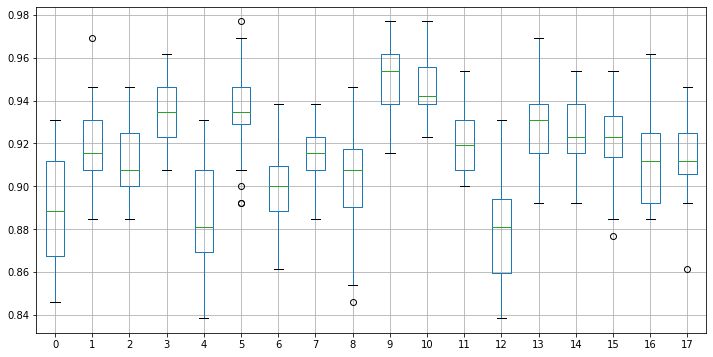

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '01'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.889615,0.026562,0.888462,01,0
1,0.919615,0.020802,0.915385,01,1
2,0.911154,0.019884,0.907692,01,2
3,0.936154,0.016000,0.934615,01,3
4,0.886538,0.025436,0.880769,01,4
5,0.934231,0.022938,0.934615,01,5
6,0.898462,0.020821,0.900000,01,6
7,0.913462,0.012695,0.915385,01,7
8,0.902308,0.026187,0.907692,01,8
9,0.950769,0.016630,0.953846,01,9
